# Notebook for creating word clouds
### Anton Elias Holt - exam in Computational linguistics at Aarhus University, spring 2021

In [1]:
import pandas as pd
import pickle
import re

import imageio
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import csv
import matplotlib.pyplot as plt

import operator
from textblob import TextBlob, Word
from textblob.sentiments import NaiveBayesAnalyzer

## Get data for hashtag word cloud

In [6]:
df = pd.read_pickle('ALL_tweets_24-05.pkl')
df

,Medlem,Parti,Twitter_navn,ALL_tweets,First_tweet,N_tweets
0,Mette Abildgaard,KF,metteabildgaard,[Status(_json={'created_at': 'Mon May 17 18:57...,2018-12-31 22:06:15,375
1,Karina Adsbøl,DF,AdsbolAdsbl,[Status(_json={'created_at': 'Sun May 16 20:44...,2018-12-31 17:06:06,430
2,Tommy Ahlers,V,aahlers,[Status(_json={'created_at': 'Fri May 07 09:04...,2018-12-20 15:04:20,100
3,Alex Ahrendtsen,DF,NaN,NaN,NaN,NaN
4,Marlene Ambo-Rasmussen,V,MarleneAmbo,[Status(_json={'created_at': 'Thu May 20 12:48...,2015-06-17 09:53:44,141
...,...,...,...,...,...,...
174,Lea Wermelin,S,LeaWermelin,[Status(_json={'created_at': 'Mon May 03 14:40...,2018-12-19 15:52:13,186
175,Susanne Zimmer,UFG,Susanne_Zimmer_,[Status(_json={'created_at': 'Sun May 23 05:54...,2019-08-26 19:08:10,1189
176,Fatma Øktem,V,fatmaoektem,[Status(_json={'created_at': 'Wed May 12 08:10...,2018-11-23 10:03:33,105
177,Orla Østerby,UFG,orlaosterby,[Status(_json={'created_at': 'Thu May 09 16:38...,2018-12-17 20:38:50,10


# creating hashtag df

In [21]:
Htag_df = pd.DataFrame()
j = 0
for list_of_tweets in df['ALL_tweets'][0:3]:
    if list_of_tweets != 'NaN':
        for tweet in list_of_tweets:
            hashtag = tweet.entities.get('hashtags')
            for i in range(0,len(hashtag)):
                Htag = hashtag[i]['text'] 
                Htag_df.at[j, 'Hashtag'] = Htag
                j+=1

In [23]:
Htag_df

,Hashtag
0,dkpol
1,dkpol
2,dkpol
3,dkpol
4,dkpol
...,...
946,ekstraordinært
947,ekstraordinært
948,dkpol
949,dkpol


In [24]:
Htag_wordcloud = Htag_df.groupby('Hashtag').size()

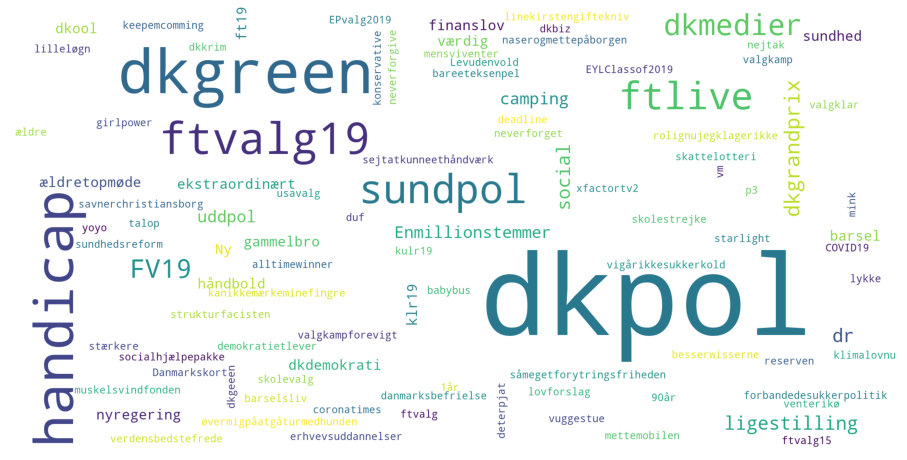

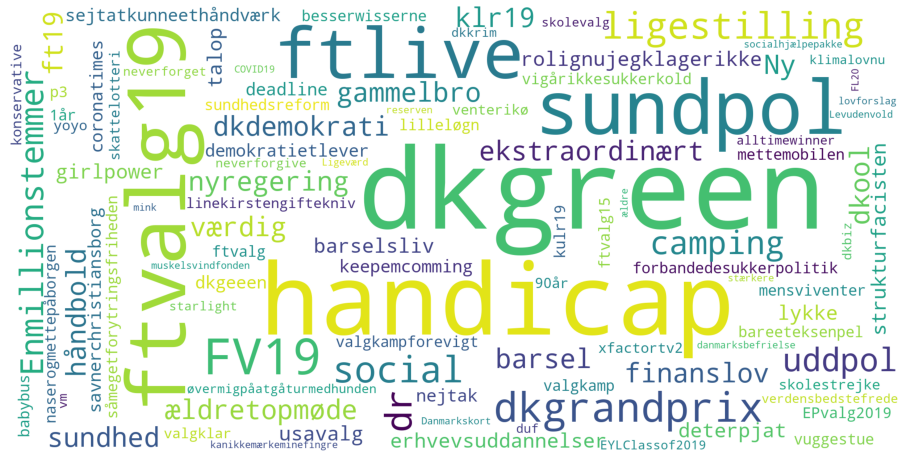

In [39]:
# Join all the text from the xxx tweets
Hashtag_combined = " ".join(Htag_df['Hashtag'].values.astype(str))

# Here we add a a few stopwords for the hashtag wordcloud
no_stop_words = " ".join([word for word in Hashtag_Combined.split()
                                if word != 'dkpol'
                                and word != 'dkmedier'
                                and word != 'DKpol'
                                and word != 'DKPOL'
                                                                
                                ])


wc = WordCloud(background_color='white', 
               stopwords=STOPWORDS,
               height = 1000,
               width = 2000,
               collocations=False,
              min_font_size =10,
              max_font_size = 250,
              max_words=100)

def my_wc(string):
    wc.generate(string)
    plt.figure( figsize=(16,9))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    print('\n')

    
"""Creating the wordclouds with and without the added stop words"""
my_wc(Hashtag_combined)
my_wc(no_stop_words)

# Below I create word clouds for each party and an aggregated word cloud

In [2]:
gode_partier = ['DF', 'EL', 'KF', 'RV', 'S', 'SF', 'V']

In [3]:
"""importing data"""
tuples_df = pd.read_pickle('big_tuples_24-05_lemmatized.pkl')
tuples_df

,Tuples
DF,[(bund kvik teste land plejehjem prioritere st...
EL,[(endelig våbenhvile israelpalæstina sikre bær...
KF,"[(ærlig god orkere bøvl indkøbspolet , KF), (v..."
RV,[(diskriminere egne statsborger bære selvfølge...
S,[(fantastisk inspirerende møde dansker forudgå...
SF,[(stoppe stigmatisering psykisk sygdom ufattel...
V,[(underligt forløbe forhandling regi klimalov ...


In [7]:
"""Defining a function for creating word clouds"""

wc = WordCloud(background_color='white', 
               stopwords=STOPWORDS,
               height = 1000,
               width = 2000,
               collocations=False,
              min_font_size =20,
              max_font_size = 300,
              max_words=70)

def my_wc(string):
    wc.generate(string)
    plt.figure( figsize=(16,9))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    print('\n')

In [4]:
def create_party_string(party_name):
    list_of_tuples = tuples_df['Tuples'][party_name]
    big_string = ""
    for tup in list_of_tuples:
        big_string += tup[0]+' '
    return big_string

In [5]:
""" two extra stop words are added specifically for the word clouds """

extra_stop_words = "regeringen danmark"


def extra_stopping(string):
    new_string = ""
    for word in string.split(' '):
        if word not in extra_stop_words:
            new_string+=word+' '
    return new_string

In [59]:
"""Here I test the create_party_string function"""

EL_string = create_party_string('EL')
print(EL_string[:200])

endelig våbenhvile israelpalæstina sikre bæredygtig frede enhedsliste kalde hasteforespørgsel opbakning international straffedomstol undersøge drab civil krigsforbrydelse ustraffet  høj barn mor hjem 


In [60]:
biggest_string = ""
for p in gode_partier:
    biggest_string += extra_stopping(create_party_string(p)) + ' '

Aggregate cloud


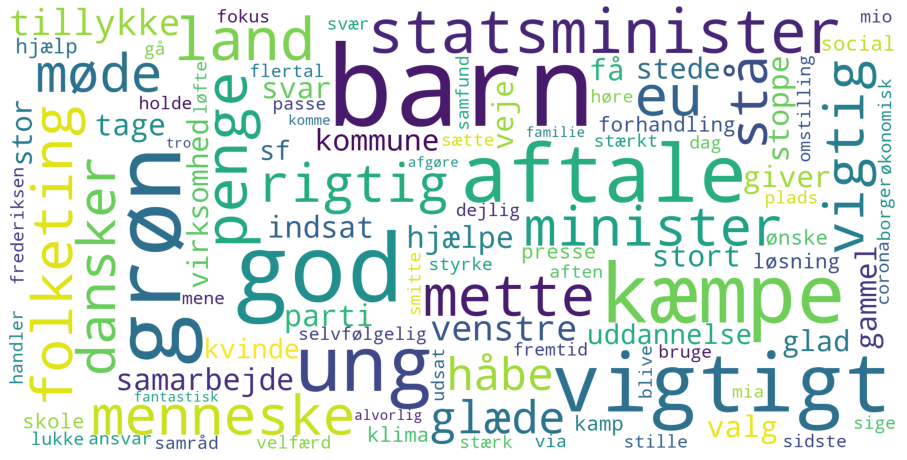



DF cloud


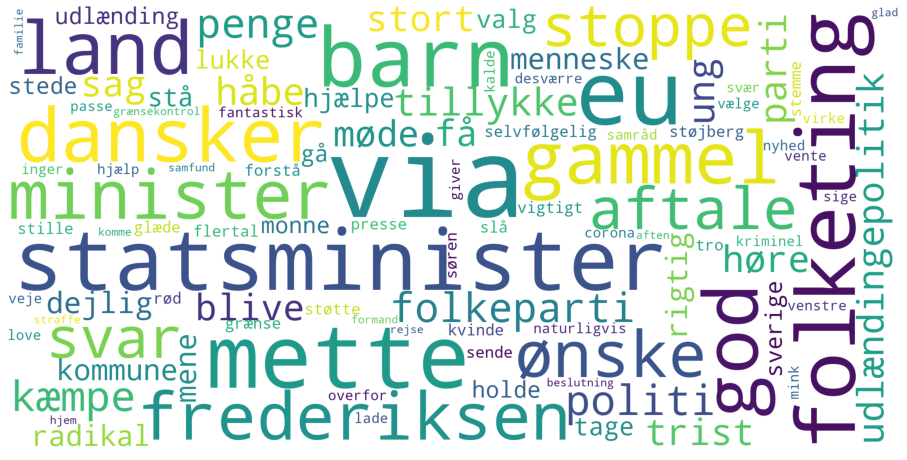



EL cloud


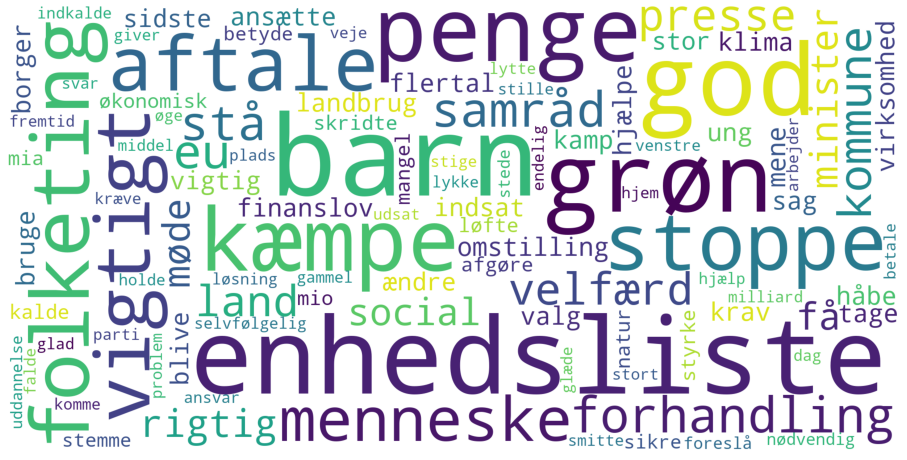



KF cloud


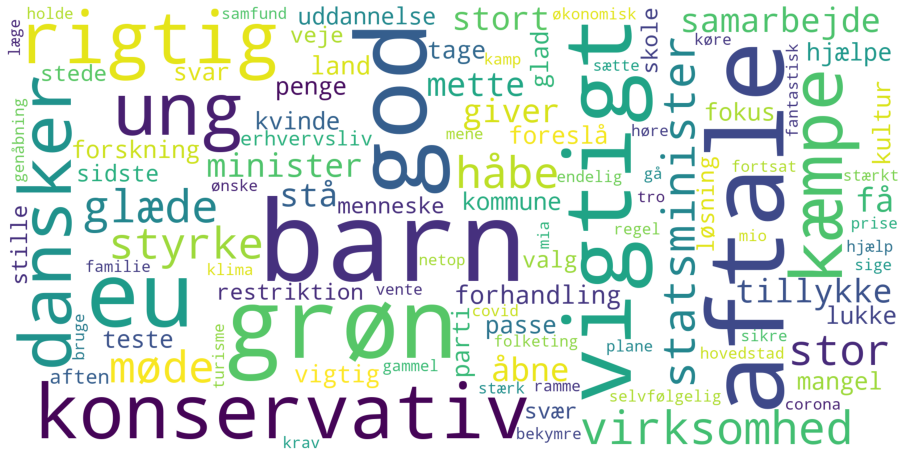



RV cloud


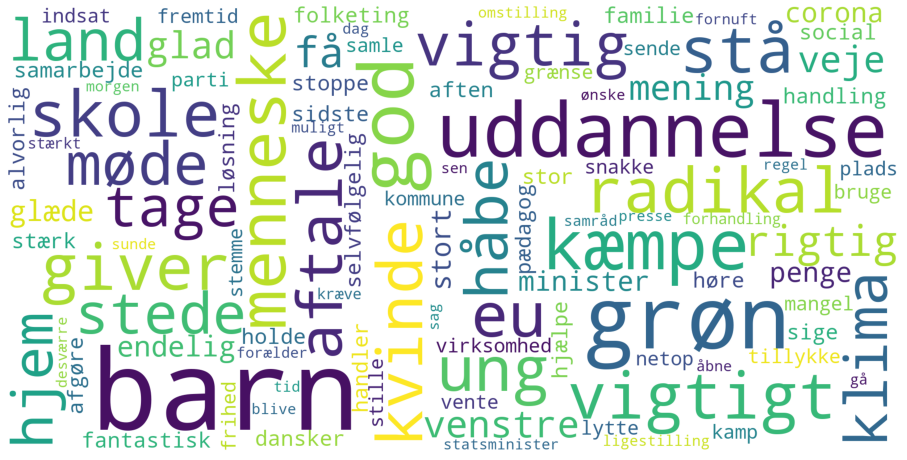



S cloud


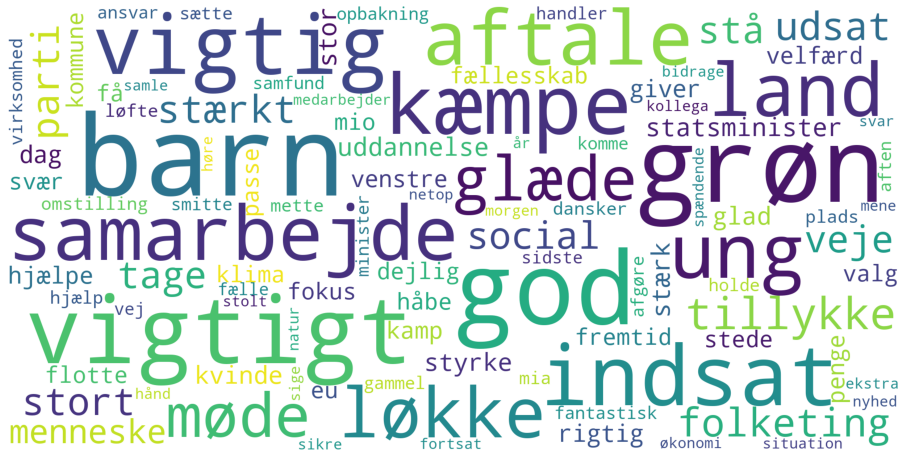



SF cloud


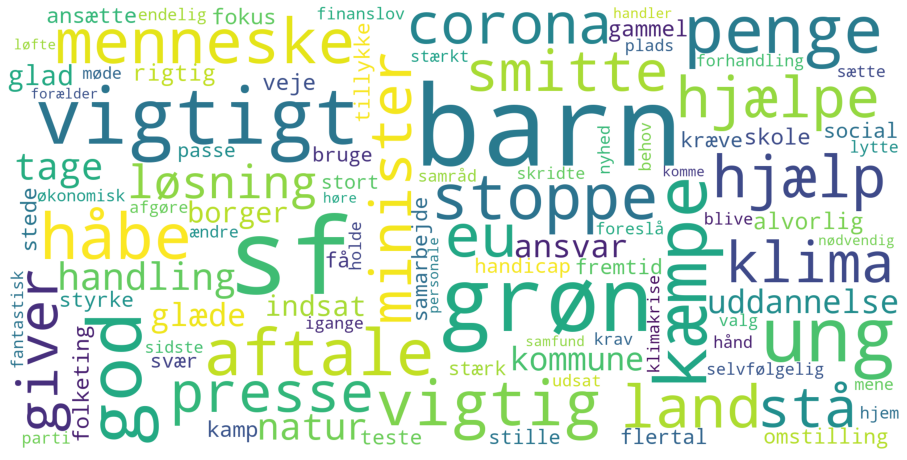



V cloud


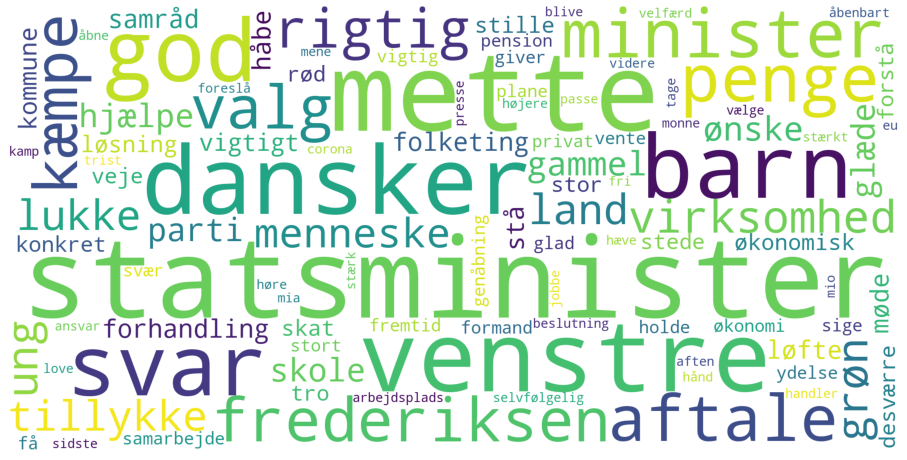

In [62]:
print('Aggregate cloud')
my_wc(biggest_string)

for p in gode_partier:
    print(p + ' cloud')
    my_wc(extra_stopping(create_party_string(p)))